# Abu DabhiGP 2022 - LEC vs. PER

In [2]:
import fastf1 as ff1
from fastf1 import plotting
from fastf1 import utils

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

In [3]:
ff1.Cache.enable_cache("cache") 

In [4]:
year, grand_prix, session = 2022, 'Abu Dabhi', 'R' 

In [5]:
session = ff1.get_session(year, grand_prix, session)
session.load()

core           INFO 	Loading data for Abu Dhabi Grand Prix - Race [v2.3.0]
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
C:\Users\righi\anaconda3\lib\site-packages\fastf1\core.py:1492: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for key, value in row.iteritems():
C:\Users\righi\anaconda3\lib\site-packages\fastf1\core.py:1415: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df = pd.concat([df, result], sort=False)
C:\Users\righi\anaconda3\lib\site-packages\fastf1\core.py:1415: FutureWarning: In a future version, obje

In [6]:
session.event

RoundNumber                                                         22
Country                                                      Abu Dhabi
Location                                                    Yas Island
OfficialEventName    FORMULA 1 ETIHAD AIRWAYS ABU DHABI GRAND PRIX ...
EventDate                                          2022-11-20 19:00:00
EventName                                         Abu Dhabi Grand Prix
EventFormat                                               conventional
Session1                                                    Practice 1
Session1Date                                       2022-11-18 14:00:00
Session2                                                    Practice 2
Session2Date                                       2022-11-18 17:00:00
Session3                                                    Practice 3
Session3Date                                       2022-11-19 15:00:00
Session4                                                    Qualifying
Sessio

In [7]:
session.results.iloc[0:20].loc[:, ['Position', 'Abbreviation', 'Time', 'GridPosition', 'Status']]

,Position,Abbreviation,Time,GridPosition,Status
1,1.0,VER,0 days 01:27:45.914000,1.0,Finished
16,2.0,LEC,0 days 01:27:54.685000,3.0,Finished
11,3.0,PER,0 days 01:27:56.007000,2.0,Finished
55,4.0,SAI,0 days 01:28:10.806000,4.0,Finished
63,5.0,RUS,0 days 01:28:21.802000,6.0,Finished
4,6.0,NOR,0 days 01:28:42.148000,7.0,Finished
31,7.0,OCO,0 days 01:28:43.154000,8.0,Finished
18,8.0,STR,0 days 01:29:02.845000,14.0,Finished
3,9.0,RIC,0 days 01:29:09.182000,13.0,Finished
5,10.0,VET,0 days 01:29:09.812000,9.0,Finished


In [8]:
lec = session.laps.pick_driver('LEC')
per = session.laps.pick_driver('PER')

In [9]:
lec.info()

<class 'fastf1.core.Laps'>
Int64Index: 58 entries, 58 to 115
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype          
---  ------              --------------  -----          
 0   Time                58 non-null     timedelta64[ns]
 1   DriverNumber        58 non-null     object         
 2   LapTime             57 non-null     timedelta64[ns]
 3   LapNumber           58 non-null     int64          
 4   PitOutTime          2 non-null      timedelta64[ns]
 5   PitInTime           1 non-null      timedelta64[ns]
 6   Sector1Time         57 non-null     timedelta64[ns]
 7   Sector2Time         58 non-null     timedelta64[ns]
 8   Sector3Time         58 non-null     timedelta64[ns]
 9   Sector1SessionTime  57 non-null     timedelta64[ns]
 10  Sector2SessionTime  58 non-null     timedelta64[ns]
 11  Sector3SessionTime  58 non-null     timedelta64[ns]
 12  SpeedI1             50 non-null     float64        
 13  SpeedI2             58 non-null     float64   

In [10]:
per.info()

<class 'fastf1.core.Laps'>
Int64Index: 58 entries, 116 to 173
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype          
---  ------              --------------  -----          
 0   Time                58 non-null     timedelta64[ns]
 1   DriverNumber        58 non-null     object         
 2   LapTime             57 non-null     timedelta64[ns]
 3   LapNumber           58 non-null     int64          
 4   PitOutTime          3 non-null      timedelta64[ns]
 5   PitInTime           2 non-null      timedelta64[ns]
 6   Sector1Time         57 non-null     timedelta64[ns]
 7   Sector2Time         58 non-null     timedelta64[ns]
 8   Sector3Time         58 non-null     timedelta64[ns]
 9   Sector1SessionTime  57 non-null     timedelta64[ns]
 10  Sector2SessionTime  58 non-null     timedelta64[ns]
 11  Sector3SessionTime  58 non-null     timedelta64[ns]
 12  SpeedI1             37 non-null     float64        
 13  SpeedI2             58 non-null     float64  

In [12]:
ff1.plotting.setup_mpl(mpl_timedelta_support=True)

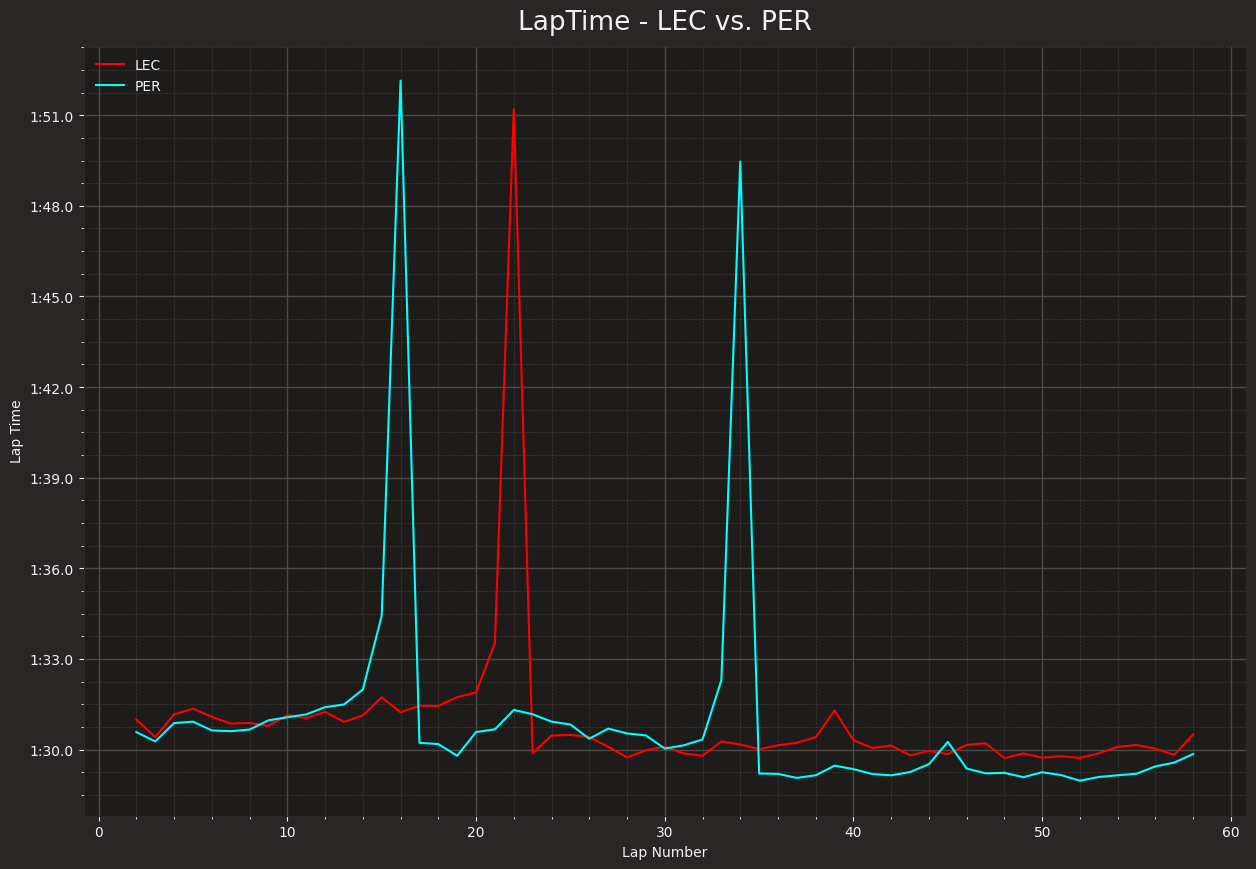

In [14]:
fig, ax = plt.subplots(figsize=(15, 10))

ax.plot(lec['LapNumber'], lec['LapTime'], color = 'red', label = 'LEC')
ax.plot(per['LapNumber'], per['LapTime'], color = 'cyan', label = 'PER')

ax.legend(loc = 'upper left', frameon = False)

ax.set_title("LapTime - LEC vs. PER")
ax.set_xlabel("Lap Number")
ax.set_ylabel("Lap Time")

plt.show()

In [19]:
lec_stints = lec[['Driver', 'Stint', 'Compound', 'LapNumber']].groupby(
    ['Driver', 'Stint', 'Compound']
).count().reset_index()

per_stints = per[['Driver', 'Stint', 'Compound', 'LapNumber']].groupby(
    ['Driver', 'Stint', 'Compound']
).count().reset_index()

In [23]:
lec_stints = lec.rename(columns={'LapNumber': 'StintLength'})

lec_stints = lec_stints.sort_values(by=['Stint'])

per_stints = per_stints.rename(columns={'LapNumber': 'StintLength'})

per_stints = per_stints.sort_values(by=['Stint'])

In [24]:
compound_colors = {
    'SOFT': '#FF3333',
    'MEDIUM': '#FFF200',
    'HARD': '#EBEBEB',
    'INTERMEDIATE': '#39B54A',
    'WET': '#00AEEF',
}

NameError: name 'race' is not defined

C:\Users\righi\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


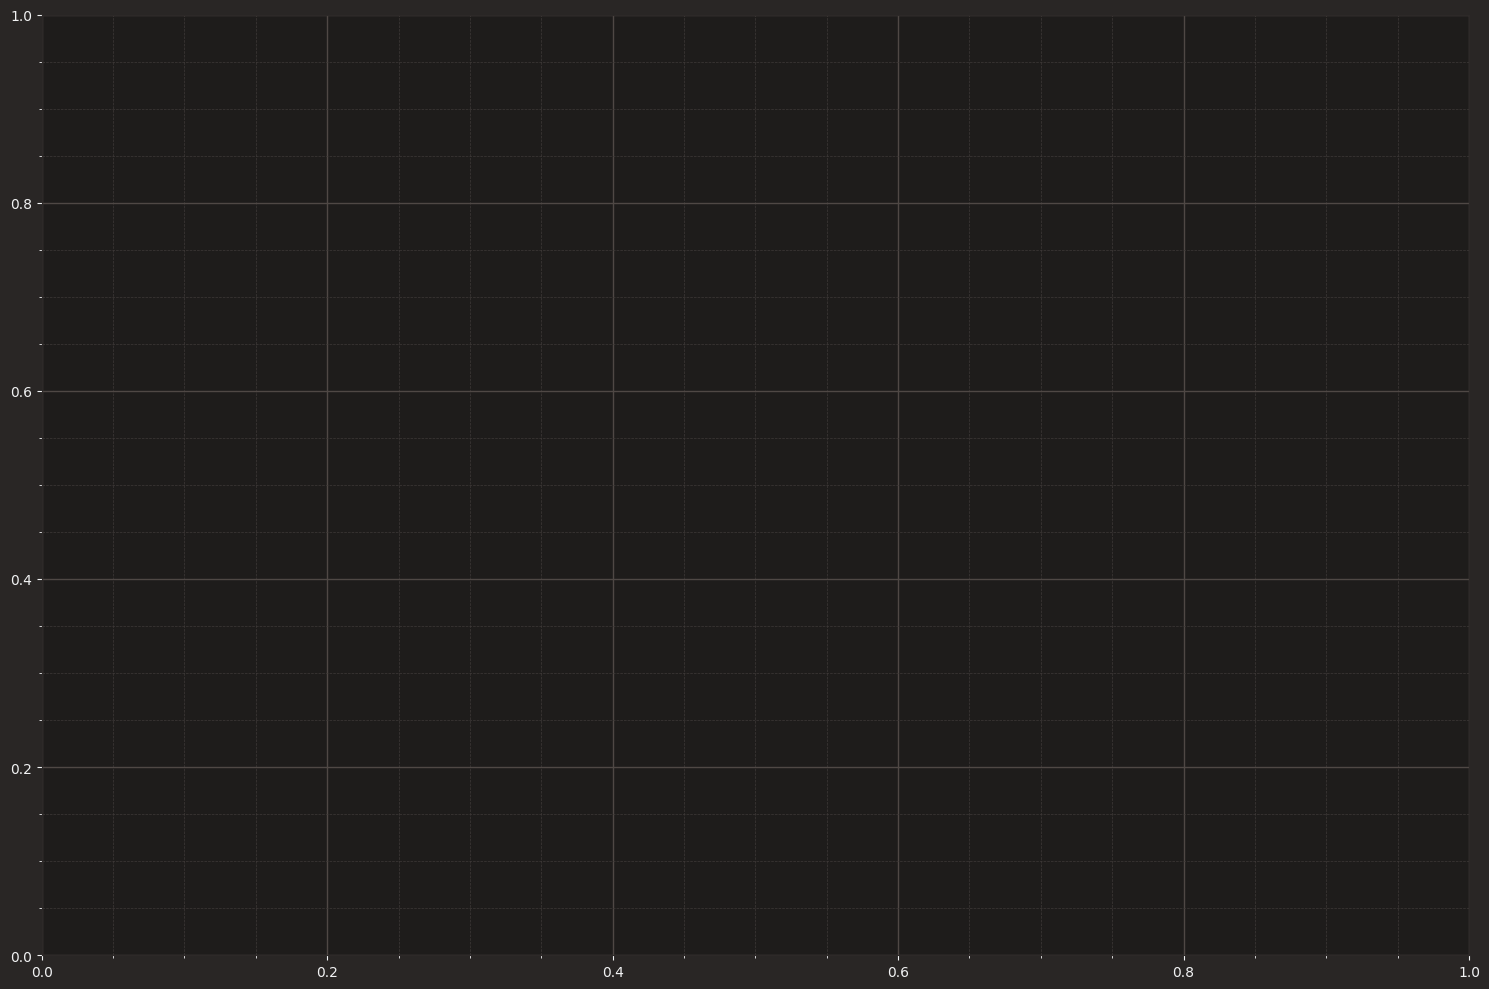

In [18]:
plt.rcParams["figure.figsize"] = [15, 10]
plt.rcParams["figure.autolayout"] = True

fig, ax = plt.subplots()

for driver in race.results['Abbreviation']:
    stints = driver_stints.loc[driver_stints['Driver'] == driver]
    
    previous_stint_end = 0
    for _, stint in stints.iterrows():
        plt.barh(
            [driver], 
            stint['StintLength'], 
            left=previous_stint_end, 
            color=compound_colors[stint['Compound']], 
            edgecolor = "black"
        )
        
        previous_stint_end = previous_stint_end + stint['StintLength']
        
# Set title
plt.title(f'Race strategy - {grand_prix} {year}')
        
# Set x-label
plt.xlabel('Lap')

# Invert y-axis 
plt.gca().invert_yaxis()

# Remove frame from plot
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.savefig('strategy_russia.png', dpi=300)

plt.show()